In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('cac_merged_20231106191438_004.csv')


In [3]:
print('Number of rows = {} and features = {}'.format(data.shape[0],data.shape[1]-1))

Number of rows = 70751 and features = 39


# Check for missing values

In [4]:
data.isna().sum()

Unnamed: 0                  0
food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
num_cars_owned              0
yearly_income               0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar

# Check for duplicate records

In [5]:
data.duplicated().value_counts()

False    70751
dtype: int64

# Lets seperate target variable and divide the data into train and test to avoid data leakage

In [6]:
X = data.drop(columns='cost')
y = data['cost']

# Let us encode and scale X_train first then followed by X_test

# catergorical features

In [7]:
categorical_features = X.select_dtypes(exclude=["number"]).columns.tolist()
categorical_features

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



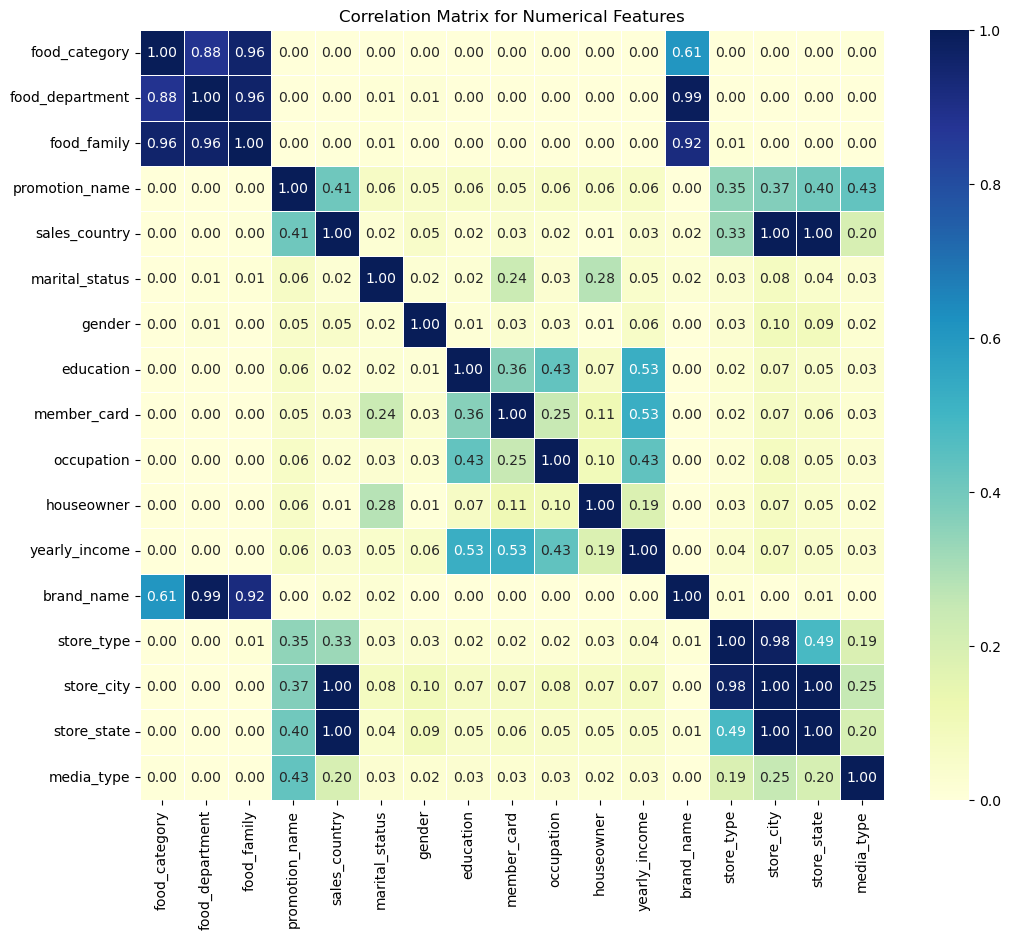

In [9]:
# Example DataFrame
cat_df = X[categorical_features]

# Calculate correlation matrix using Cramér's V
correlation_matrix = cat_df.apply(lambda x: cat_df.apply(lambda y: cramers_v(x, y)))
#print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


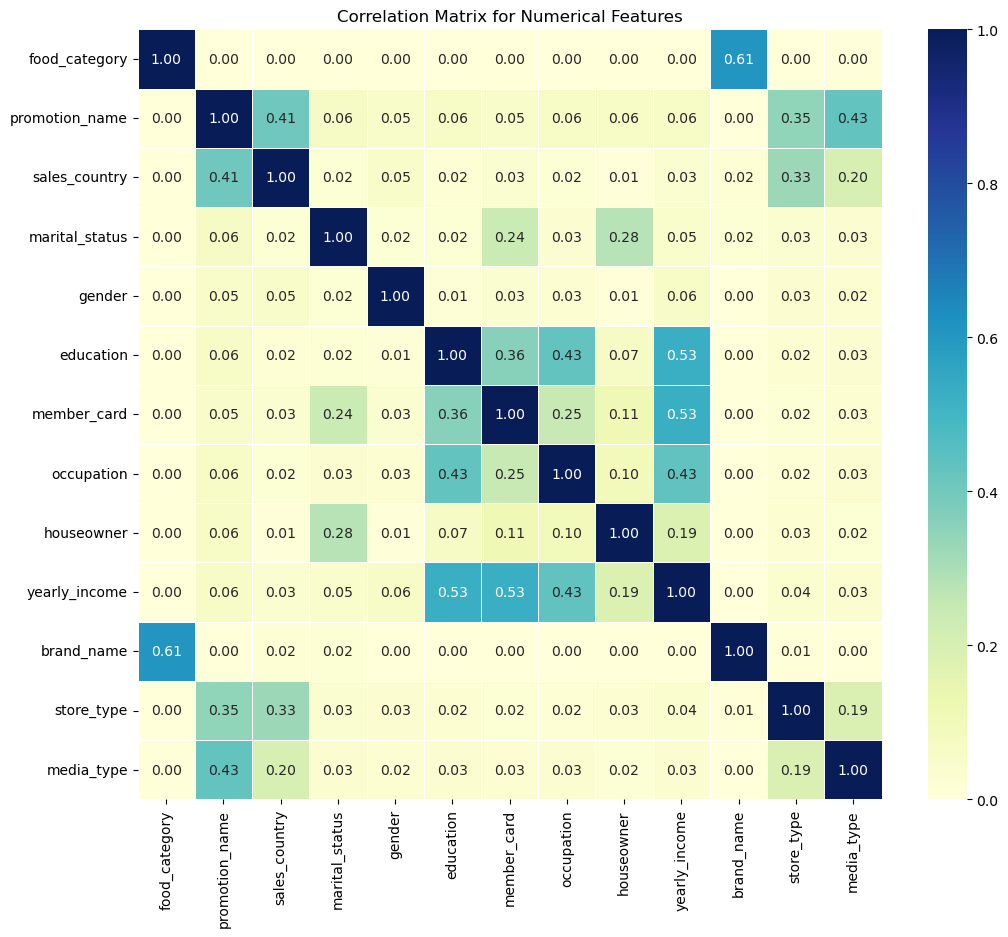

In [10]:
columns=['food_department','food_family','store_city','store_state']
cat_df=cat_df.drop(columns=columns,axis=1)
# Calculate correlation matrix using Cramér's V
correlation_matrix = cat_df.apply(lambda x: cat_df.apply(lambda y: cramers_v(x, y)))
#print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


## Numerical features

In [11]:

numerical_features = X.select_dtypes(include=["number"]).columns.tolist()
numerical_features

['Unnamed: 0',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [12]:
num_df = X[numerical_features]


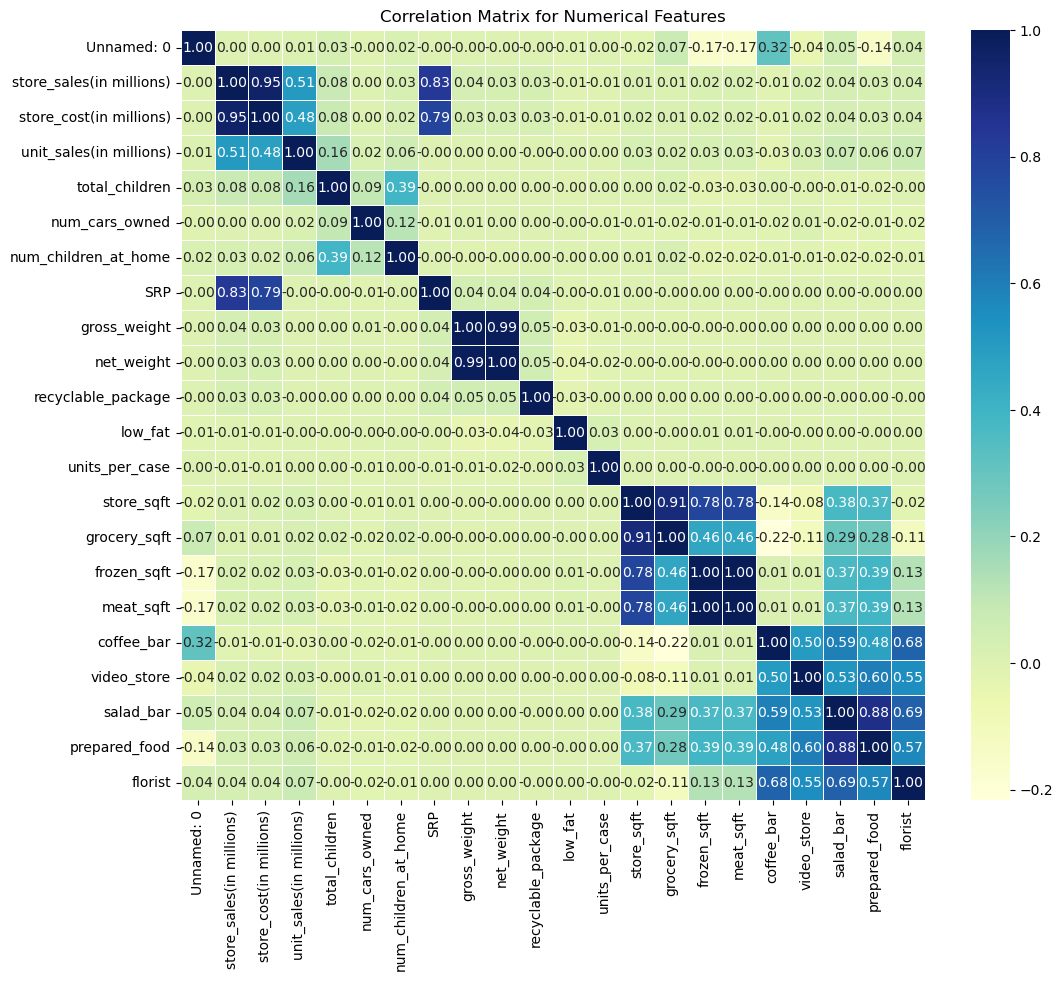

In [13]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

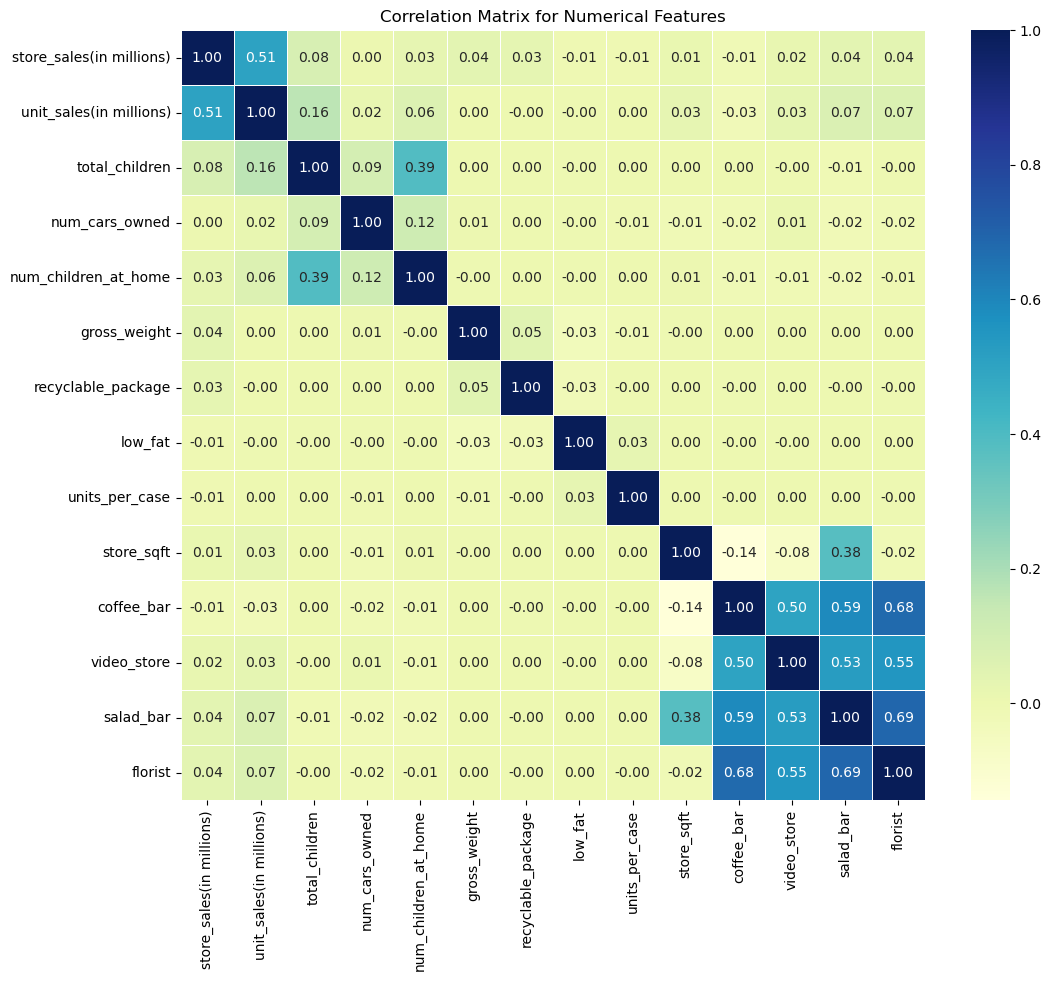

In [14]:
columns=['Unnamed: 0','store_cost(in millions)','SRP','net_weight','grocery_sqft','meat_sqft','frozen_sqft','prepared_food']
num_df=num_df.drop(columns=columns,axis=1)
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [15]:
num_df.shape,cat_df.shape
X=pd.concat([cat_df, num_df], axis=1)
X.shape

(70751, 27)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('Y_train shape = ',Y_train.shape)
print('Y_test shape = ',Y_test.shape)

X_train shape =  (56600, 27)
X_test shape =  (14151, 27)
Y_train shape =  (56600,)
Y_test shape =  (14151,)


# Listing all the different categories in categorical variables

##### Converting Binary variable to numerical

In [18]:
bin_cat_col = list()
for col in cat_df:
    if(len(X_train[col].value_counts())==2):
        print(col)
        bin_cat_col.append(col)



marital_status
gender
houseowner


In [19]:
X_train['marital_status'] = X_train['marital_status'].replace({'M':1,'S':0})
X_train['gender'] = X_train['gender'].replace({'F':1,'M':0})
X_train['houseowner'] = X_train['houseowner'].replace({'Y':1,'N':0})
X_train[bin_cat_col]

,marital_status,gender,houseowner
69390,1,1,1
67704,1,0,1
43387,0,0,1
47323,1,1,1
65373,0,1,0
...,...,...,...
37194,0,1,0
6265,0,1,1
54886,1,0,1
860,0,0,1


In [20]:
X_test['marital_status'] = X_test['marital_status'].replace({'M':1,'S':0})
X_test['gender'] = X_test['gender'].replace({'F':1,'M':0})
X_test['houseowner'] = X_test['houseowner'].replace({'Y':1,'N':0})
X_test[bin_cat_col]

,marital_status,gender,houseowner
52631,1,1,1
63396,1,1,1
64124,1,1,1
69697,1,0,1
53180,1,0,1
...,...,...,...
30400,1,0,1
40723,1,0,1
18023,1,0,0
63717,1,0,0


##### Non-Binary Categorical Variables

In [21]:
Non_bin_cat_col = list(set(cat_df)-set(bin_cat_col))
Non_bin_cat_col

['media_type',
 'education',
 'brand_name',
 'occupation',
 'food_category',
 'sales_country',
 'promotion_name',
 'member_card',
 'store_type',
 'yearly_income']

In [22]:
ordinal_cols = ['education', 'member_card', 'occupation','yearly_income','store_type']
nominal_cols = list(set(Non_bin_cat_col)-set(ordinal_cols))

In [23]:
len(Non_bin_cat_col)==len(ordinal_cols)+len(nominal_cols)

True

In [24]:
print('ordinal columns:')
print(ordinal_cols)
print('nominal columns')
print(nominal_cols)

ordinal columns:
['education', 'member_card', 'occupation', 'yearly_income', 'store_type']
nominal columns
['media_type', 'brand_name', 'food_category', 'sales_country', 'promotion_name']


In [25]:
ordin=data[ordinal_cols]
ordin

,education,member_card,occupation,yearly_income,store_type
0,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
1,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
2,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
3,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
4,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
...,...,...,...,...,...
70746,Bachelors Degree,Bronze,Professional,$50K - $70K,Small Grocery
70747,Bachelors Degree,Bronze,Professional,$50K - $70K,Small Grocery
70748,High School Degree,Bronze,Manual,$30K - $50K,Small Grocery
70749,High School Degree,Bronze,Manual,$30K - $50K,Small Grocery


In [26]:
data[nominal_cols]

,media_type,brand_name,food_category,sales_country,promotion_name
0,Radio,Nationeel,Snack Foods,USA,Go For It
1,Radio,Hilltop,Hygiene,USA,Go For It
2,Radio,Fabulous,Carbonated Beverages,USA,Go For It
3,Radio,Bird Call,Decongestants,USA,Go For It
4,Radio,Great,Bread,USA,Go For It
...,...,...,...,...,...
70746,Street Handout,PigTail,Meat,Mexico,Mystery Sale
70747,Street Handout,Landslide,Jams and Jellies,Mexico,Mystery Sale
70748,Street Handout,High Top,Vegetables,Mexico,Mystery Sale
70749,Street Handout,Sunset,Cleaning Supplies,Mexico,Mystery Sale


In [27]:
X_train_ordinal=X_train[ordinal_cols]
X_test_ordinal=X_test[ordinal_cols]

In [28]:
# ordinal variables are encoded using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_ordinal=ordinal_encoder.fit_transform(X_train_ordinal)
X_test_ordinal = ordinal_encoder.transform(X_test_ordinal)

In [29]:
X_train_ordinal = pd.DataFrame(X_train_ordinal, columns=ordinal_cols)
X_test_ordinal = pd.DataFrame(X_test_ordinal, columns=ordinal_cols)

In [30]:
X_train_nominal = X_train[nominal_cols]
X_test_nominal = X_test[nominal_cols]

In [31]:
# nominal variables are encoded using onehotencoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train_nominal)
X_train_nominal = onehot_encoder.transform(X_train_nominal)
X_test_nominal = onehot_encoder.transform(X_test_nominal)

In [32]:
X_train_nominal = pd.DataFrame.sparse.from_spmatrix(X_train_nominal)
X_test_nominal = pd.DataFrame.sparse.from_spmatrix(X_test_nominal)

In [33]:
# lets drop the non binary not encoded categorical columns
X_train.drop(columns=Non_bin_cat_col, inplace=True)
X_test.drop(columns=Non_bin_cat_col, inplace=True)

In [34]:
# lets add the ordinal and nominal encoded columns to X_train and X_test
X_train_new = pd.concat([X_train.reset_index(drop=True), X_train_ordinal.reset_index(drop=True), X_train_nominal.reset_index(drop=True)], axis=1)
X_test_new = pd.concat([X_test.reset_index(drop=True), X_test_ordinal.reset_index(drop=True), X_test_nominal.reset_index(drop=True)], axis=1)

In [35]:
print('X_train shape after categorical columns encoding = ', X_train_new.shape)
print('X_test shape after categorical columns encoding = ', X_test_new.shape)

X_train shape after categorical columns encoding =  (56600, 243)
X_test shape after categorical columns encoding =  (14151, 243)


In [36]:
X_train_new

,marital_status,gender,houseowner,store_sales(in millions),unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,education,member_card,occupation,yearly_income,store_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220
0,1,1,1,7.64,2,1,2,0,14.10,0,1,32,27950.0,0,0,0,0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,3.14,2,1,2,1,8.79,0,0,21,27950.0,1,0,1,1,4.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,9.75,3,0,0,0,17.20,1,0,15,27950.0,1,0,1,1,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,18.10,5,5,2,5,19.70,1,0,12,34791.0,0,0,1,0,4.0,2.0,2.0,0.0

# Outlier Analysis

In [37]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test_new.columns = X_test_new.columns.astype(str)

In [38]:
# lets get the outliers in X_train
local_outlier_factor = LocalOutlierFactor()
y_outlier_pred = local_outlier_factor.fit_predict(X_train)

In [39]:
# predicts 1(not outlier) or -1(outlier) using KNN algorithm in background
y_outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
not_outliers = y_outlier_pred != -1

In [41]:
not_outliers = pd.DataFrame(not_outliers, columns=['not_outlier'])

In [42]:
not_outliers.head()

,not_outlier
0,True
1,True
2,True
3,True
4,True


In [43]:
not_outliers.shape

(56600, 1)

In [44]:
# Not outliers = True and Outliers = False
not_outliers['not_outlier'].value_counts()

True     56575
False       25
Name: not_outlier, dtype: int64

In [45]:
not_outliers.isna().sum()

not_outlier    0
dtype: int64

In [46]:
# lets remove the 18 outliers from X_train and Y_train
X_train_new['not_outlier'] = not_outliers

In [47]:
# sample outliers in X_train
X_train_new[X_train_new['not_outlier']==False]

,marital_status,gender,houseowner,store_sales(in millions),unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,education,member_card,occupation,yearly_income,store_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,not_outlier
1007,0,1,0,18.70,5,5,1,0,10.30,1,0,34,39696.0,0,0,1,0,4.0,3.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5483,1,0,0,18.60,5,4,2,4,6.16,1,0,21,23759.0,1,0,1,1,4.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5808,0,1,1,19.75,5,4,1,0,18.30,0,0,35,33858.0,1,0,1,1,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5997,1,1,1,19.00,5,5,2,5

In [48]:
Y_train.shape

(56600,)

In [49]:
Y_train = pd.concat([Y_train.reset_index(drop=True), not_outliers.reset_index(drop=True)],axis=1)
Y_train.head()

,cost,not_outlier
0,69.29,True
1,70.06,True
2,32.60,True
3,39.61,True
4,71.03,True


In [50]:
X_train_new.shape, Y_train.shape

((56600, 244), (56600, 2))

In [51]:
X_train_new = X_train_new[X_train_new['not_outlier']]

In [52]:
X_train_new['not_outlier'].value_counts()

True    56575
Name: not_outlier, dtype: int64

In [53]:
Y_train = Y_train[Y_train['not_outlier']]

In [54]:
Y_train['not_outlier'].value_counts()

True    56575
Name: not_outlier, dtype: int64

In [55]:
X_train_new.drop(columns=['not_outlier'],inplace=True)
Y_train.drop(columns=['not_outlier'],inplace=True)

In [56]:
X_train_new.shape, Y_train.shape

((56575, 243), (56575, 1))

# lets generate two sets of X_train one with numeric columns being standardized and one with numeric columns being normalized

In [57]:
pure_numeric = ['store_sales(in millions)',
 'gross_weight',
 'units_per_case',
 'store_sqft']

for col in pure_numeric:
  print('-'*30)
  print(col)
  print('-'*30)
  print(len(X_train[col].value_counts()))
  print()

------------------------------
store_sales(in millions)
------------------------------
1030

------------------------------
gross_weight
------------------------------
376

------------------------------
units_per_case
------------------------------
36

------------------------------
store_sqft
------------------------------
21



In [58]:
X_train[pure_numeric]

,store_sales(in millions),gross_weight,units_per_case,store_sqft
69390,7.64,14.10,32,27950.0
67704,3.14,8.79,21,27950.0
43387,9.75,17.20,15,27950.0
47323,18.10,19.70,12,34791.0
65373,13.72,13.20,5,27950.0
...,...,...,...,...
37194,4.26,8.25,35,23759.0
6265,6.74,18.90,18,23598.0
54886,1.54,15.70,9,21215.0
860,11.79,15.50,23,39696.0


In [59]:
# numerical valued features which might be actually categorical features
cat_num_features = [
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist']
for col in cat_num_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(X_train[col].value_counts())

------------------------------
unit_sales(in millions)
------------------------------
3    25520
4    15542
2    12688
5     1936
1      892
6       22
Name: unit_sales(in millions), dtype: int64
------------------------------
total_children
------------------------------
4    11627
2    11597
3    11355
1    10964
5     5889
0     5168
Name: total_children, dtype: int64
------------------------------
num_cars_owned
------------------------------
2    17237
3    15882
1    12747
4     7526
0     3208
Name: num_cars_owned, dtype: int64
------------------------------
num_children_at_home
------------------------------
0    35280
1     8171
2     5489
3     4094
4     2353
5     1213
Name: num_children_at_home, dtype: int64
------------------------------
recyclable_package
------------------------------
1    31653
0    24947
Name: recyclable_package, dtype: int64
------------------------------
low_fat
------------------------------
0    36867
1    19733
Name: low_fat, dtype: int64
-------

In [60]:
X_train[cat_num_features]

,unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,florist
69390,2,1,2,0,0,1,0,0,0,0
67704,2,1,2,1,0,0,1,0,1,1
43387,3,0,0,0,1,0,1,0,1,1
47323,5,5,2,5,1,0,0,0,1,0
65373,4,4,2,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
37194,3,4,2,0,1,0,1,0,1,1
6265,2,2,1,0,0,0,0,0,0,1
54886,2,4,3,3,1,1,1,0,0,0
860,3,1,2,0,1,1,0,0,1,0


In [61]:
X_train_num = X_train_new[pure_numeric]
X_test_num = X_test_new[pure_numeric]

In [62]:
std_scalar = StandardScaler()
X_train_std_num=std_scalar.fit_transform(X_train_num)
X_test_std_num = std_scalar.transform(X_test_num)

In [63]:
X_train_std_num = pd.DataFrame(X_train_std_num,columns=X_train_num.columns)
X_train_std_num.head()

,store_sales(in millions),gross_weight,units_per_case,store_sqft
0,0.317985,0.063574,1.280552,-0.004413
1,-0.977546,-1.085754,0.209133,-0.004413
2,0.925445,0.734556,-0.375278,-0.004413
3,3.329376,1.275671,-0.667483,1.293583
4,2.068392,-0.131228,-1.349295,-0.004413


In [64]:
X_test_std_num = pd.DataFrame(X_test_std_num,columns=X_test_num.columns)
X_test_std_num.head()

,store_sales(in millions),gross_weight,units_per_case,store_sqft
0,-0.326901,-0.326029,-1.154492,0.495356
1,-0.395996,0.193441,-0.472679,-0.004413
2,2.172034,-0.737276,1.475355,-0.004413
3,-1.524548,0.388243,1.085748,-0.004413
4,2.241129,-0.542475,1.572757,0.495356


In [65]:
X_train_non_num = list(set(X_train_new.columns )-set(X_train_std_num.columns))
X_train_nn = X_train_new[X_train_non_num]
X_train_std = pd.concat([X_train_nn.reset_index(drop=True),X_train_std_num.reset_index(drop=True)],axis=1)

In [66]:
X_test_non_num = list(set(X_test_new.columns)-set(X_test_std_num.columns))
X_test_nn = X_test_new[X_test_non_num]
X_test_std = pd.concat([X_test_nn.reset_index(drop=True),X_test_std_num.reset_index(drop=True)],axis=1)

In [67]:
X_train_std.shape, X_test_std.shape

((56575, 243), (14151, 243))

In [68]:
Y_train.shape, Y_test.shape

((56575, 1), (14151,))

In [69]:
X_train_std = X_train_std.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [70]:
X_test_std = X_test_std.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Feature selection: Retain p-significant features

In [71]:
import statsmodels.api as sm

def get_p_significant_features(X,y):
  X = sm.add_constant(X)
  ols_model = sm.OLS(y, X).fit()

  p_features = {}
  for i in X.columns.tolist():
    p_features[f'{i}'] = ols_model.pvalues[i]

  data_p_value= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
  print('-'*50)
  print('p-significant columns/features')
  print('-'*50)
  print(data_p_value[data_p_value['p-Value'] < 0.05])
  significant_features = data_p_value[data_p_value['p-Value']<0.05]['Feature_name'].tolist()

  return significant_features


X_train_significant = get_p_significant_features(X_train_std,Y_train)
print(X_train_significant)

--------------------------------------------------
p-significant columns/features
--------------------------------------------------
               Feature_name   p-Value
0                     const  0.000000
1                        11  0.000000
2                 salad_bar  0.000000
3                       170  0.000000
4   unit_sales(in millions)  0.000000
..                      ...       ...
78                       93  0.028880
79                       80  0.033411
80                      207  0.041709
81                       27  0.044424
82                      102  0.048183

[83 rows x 2 columns]
['const', '11', 'salad_bar', '170', 'unit_sales(in millions)', '169', 'florist', '171', 'coffee_bar', '219', '199', '185', '1', '217', '9', 'store_sqft', '188', '209', '192', '193', '184', '218', '12', '176', 'video_store', '202', '213', '6', '174', '7', '189', '216', '182', '2', '208', '214', '3', '172', '0', 'store_type', '183', '173', '210', '215', '206', '198', '181', '197', '205',

In [72]:
num_col_list = list()
str_col_list = list()
for col in X_train_significant:
  if(col.isdigit()):
    num_col_list.append(int(col))
  else:
    str_col_list.append(col)

print(num_col_list)
print(str_col_list)

[11, 170, 169, 171, 219, 199, 185, 1, 217, 9, 188, 209, 192, 193, 184, 218, 12, 176, 202, 213, 6, 174, 7, 189, 216, 182, 2, 208, 214, 3, 172, 0, 183, 173, 210, 215, 206, 198, 181, 197, 205, 203, 165, 190, 212, 5, 194, 177, 201, 196, 152, 167, 220, 141, 166, 178, 187, 130, 180, 168, 127, 148, 71, 144, 126, 204, 93, 80, 207, 27, 102]
['const', 'salad_bar', 'unit_sales(in millions)', 'florist', 'coffee_bar', 'store_sqft', 'video_store', 'store_type', 'total_children', 'houseowner', 'marital_status', 'num_cars_owned']


In [73]:
str_col_list.remove('const')

In [74]:
significant_col_list = list()
significant_col_list.extend(str_col_list)
significant_col_list.extend(num_col_list)
print('significant_col_list',significant_col_list)

significant_col_list ['salad_bar', 'unit_sales(in millions)', 'florist', 'coffee_bar', 'store_sqft', 'video_store', 'store_type', 'total_children', 'houseowner', 'marital_status', 'num_cars_owned', 11, 170, 169, 171, 219, 199, 185, 1, 217, 9, 188, 209, 192, 193, 184, 218, 12, 176, 202, 213, 6, 174, 7, 189, 216, 182, 2, 208, 214, 3, 172, 0, 183, 173, 210, 215, 206, 198, 181, 197, 205, 203, 165, 190, 212, 5, 194, 177, 201, 196, 152, 167, 220, 141, 166, 178, 187, 130, 180, 168, 127, 148, 71, 144, 126, 204, 93, 80, 207, 27, 102]


In [75]:
print('P-significant features:',len(significant_col_list))

P-significant features: 82


In [76]:
X_train_significant.remove("const")

In [77]:
print(X_train_significant)

['11', 'salad_bar', '170', 'unit_sales(in millions)', '169', 'florist', '171', 'coffee_bar', '219', '199', '185', '1', '217', '9', 'store_sqft', '188', '209', '192', '193', '184', '218', '12', '176', 'video_store', '202', '213', '6', '174', '7', '189', '216', '182', '2', '208', '214', '3', '172', '0', 'store_type', '183', '173', '210', '215', '206', '198', '181', '197', '205', '203', 'total_children', '165', '190', '212', 'houseowner', '5', '194', '177', '201', '196', '152', '167', '220', '141', 'marital_status', '166', 'num_cars_owned', '178', '187', '130', '180', '168', '127', '148', '71', '144', '126', '204', '93', '80', '207', '27', '102']


In [78]:
X_train_signi = X_train_std[X_train_significant]
X_test_signi = X_test_std[X_train_significant]
X_train_signi.shape,X_test_signi.shape

((56575, 82), (14151, 82))

In [79]:
# shape of X_train and X_test after select p-significant features
X_train_signi.shape, X_test_signi.shape

((56575, 82), (14151, 82))

##### Principal Component Analysis

In [80]:
from sklearn.decomposition import PCA
def pca_dim_reduction(X_train,X_test):
    pca=PCA(0.95)
    X_pca_train=pca.fit_transform(X_train)
    X_pca_test=pca.transform(X_test)
    return X_pca_train, X_pca_test

In [81]:
X_pca_train, X_pca_test=pca_dim_reduction(X_train_signi,X_test_signi)
X_pca_train.shape, X_pca_test.shape,Y_train.shape

((56575, 39), (14151, 39), (56575, 1))

In [116]:
#Create a DataFrame from the transformed data
columns = [f"PC_{i + 1}" for i in range(X_pca_train.shape[1])]
df_pca = pd.DataFrame(data=X_pca_train, columns=columns)
df_pca
# Display the DataFrame
#print(df_pca.head())

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39
0,-0.407752,-1.660847,-0.085902,0.013809,-0.929072,-0.075786,-0.686758,-1.049696,-0.090671,0.015033,0.005691,-0.085379,-0.154957,-0.336065,-0.003071,0.051288,-0.041412,-0.007809,0.162949,-0.057327,0.069564,0.416105,0.763743,0.033250,0.122659,-0.089176,0.150085,-0.046103,0.059436,0.058311,-0.018869,-0.017453,0.066823,-0.088202,0.036023,-0.036410,0.124681,-0.038699,0.039242
1,-1.712274,-1.648772,-0.044664,0.019800,-0.810752,-0.513673,-0.711366,1.083315,0.242002,0.088585,0.191709,0.867716,0.291658,-0.494457,0.074411,-0.054076,-0.030241,0.077308,-0.199382,0.234154,-0.015905,0.366008,0.782690,0.142194,0.142026,-0.027644,0.143319,0.012874,-0.086403,0.015305,-0.129099,-0.055587,-0.045850,-0.068535,0.026888,0.030243,-0.108062,0.036914,-0.042722
2,2.152266,-2.873774,1.791142,-0.215914,0.174843,0.707334,0.065166,0.063404,-0.618468,-0.058079,0.727393,-0.054142,-0.308831,-0.247845,0.512573,0.381738,0.507983,0.017054,-0.119024,-0.028837,-0.019835,0.376981,0.787306,0.125710,0.110057,-0.224085,0.157975,-0.047418,0.036369,-0.034250,-0.071684,-0.052761,-0.023469,-0.022085,0.024103,0.001199,0.020105,-0.030281,-0.022946
3,-1.619029,2.659260,0.778513,1.803926,1.527249,0.943861,-0.495913,0.441668,0.063536,0.037586,-0.284260,0.053643,0.046252,-0.157306,0.062250,0.029475,-0.068625,0.011629,-0.056733,-0.178178,0.102376,0.087833,-0.119987,-0.057092,-0.063509,-0.268140,-0.050308,-0.090251,0.046042,-0.026111,0.030226,-0.065526,0.025631,-0.086397,-0.008939,-0.006608,0.046249,-0.077762,0.052729
4,-1.636157,1.522680,0.497458,0.073711,0.795568,-0.566830,0.740226,1.050923,0.249867,0.019316,0.132773,0.146463,-0.603009,0.078910,-0.458606,-0.458124,0.192384,0.177107,-0.265746,0.185017,0.016611,-0.271335,0.074991,0.159150,-0.084783,-0.119364,-0.224641,-0.172942,-0.211281,-0.072888,-0.140530,-0.003530,-0.048244,-0.079138,-0.274883,0.608983,0.233430,0.218904,-0.075751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56570,1.210366,1.357238,0.382591,-0.787867,-0.235816,0.754174,0.863464,0.383248,0.146814,-0.049841,0.545624,-0.026032,-0.010104,-0.146340,0.033341,0.024580,-0.140592,0.035727,0.177705,-0.060620,0.066263,-0.118315,0.009218,0.157386,-0.068685,-0.268886,-0.036432,-0.062126,-0.067230,-0.077882,-0.081783,-0.148660,-0.017555,-0.121335,-0.006054,-0.137659,0.201905,0.464928,0.677506
56571,-2.151406,-0.809284,1.025446,-0.849883,-0.895116,-0.208619,0.002087,0.175801,-0.567942,-0.090599,0.245755,-0.773326,0.648357,-0.528733,-0.237178,-0.297493,0.346354,-0.011523,-0.267495,0.396914,-0.004386,-0.115648,0.022620,0.086813,-0.024142,0.210073,-0.088564,0.203940,-0.233010,-0.178608,0.429049,-0.457224,0.253429,0.124150,-0.059430,-0.021814,0.050882,-0.117867,-0.007430
56572,-2.154182,1.464761,-0.722601,-1.176612,-1.177422,-0.010921,-0.607755,0.082280,0.046014,0.749592,0.168705,0.915588,0.364177,0.489343,0.009459,-0.020573,0.009493,0.029677,-0.158222,0.008020,-0.086932,0.145644,-0.056620,-0.184027,0.036700,0.153007,0.040095,0.029537,-0.177037,0.067791,-0.190938,-0.191376,-0.123621,0.019348,-0.013316,-0.004219,-0.006322,0.101501,-0.027102
56573,-1.801699,-1.540672,0.228861,2.481825,-0.000890,-0.610505,0.033415,0.270678,-0.600557,0.067225,-0.382725,-0.070843,-0.139961,-0.125727,0.411067,-0.388694,-0.465712,-0.548294,-0.400536,-0.145193,-0.172543,-0.165342,-0.028230,-0.051394,-0.128133,-0.228180,-0.281515,-0.140293,0.070786,0.041604,0.007084,-0.120168,-0.024205,0.066507,0.861130,-0.053861,-0.135131,0.254355,-0.322305


### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a metrics_calculation function defined/imported
def metrics_calculation(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

# Create and fit the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_pca_train, Y_train)

# Predictions on the test set
test_preds = dt_regressor.predict(X_pca_test)

# Evaluate the model on the test set
test_metrics = metrics_calculation(Y_test, test_preds)
print("Test Metrics:", test_metrics) 

Test Metrics: {'MAE': 2.490513954367512, 'MSE': 349.1478680276322, 'RMSE': 18.68549887018359, 'R^2': 0.9390266619822927}


### Modeling

In [106]:
X_train_h,X_Valid,Y_train_h,Y_Valid=train_test_split(X_pca_train,Y_train,test_size=0.25,random_state=42)
X_train_h.shape,X_Valid.shape,Y_train_h.shape,Y_Valid.shape

((42431, 39), (14144, 39), (42431, 1), (14144, 1))

In [107]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their possible values
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Creating the GridSearchCV object
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the grid search to the data
grid_search.fit(X_train_h, Y_train_h)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions on the validation set using the best model
best_model = grid_search.best_estimator_
valid_preds = best_model.predict(X_Valid)

# Evaluating the model on the validation set
valid_metrics = metrics_calculation(Y_Valid, valid_preds)
print("Validation Metrics:", valid_metrics)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Validation Metrics: {'MAE': 7.001977340651761, 'MSE': 729.8428982395072, 'RMSE': 27.01560471726493, 'R^2': 0.8849678154989359}


In [113]:
dt_regressor = DecisionTreeRegressor(max_depth=15, min_samples_leaf= 2, min_samples_split= 10)
dt_regressor.fit(X_pca_train, Y_train)

# Predictions on the test set
test_preds = dt_regressor.predict(X_pca_test)

# Evaluate the model on the test set
test_metrics = metrics_calculation(Y_test, test_preds)
print("Test Metrics:", test_metrics)

Test Metrics: {'MAE': 6.431453615617787, 'MSE': 513.802008264903, 'RMSE': 22.667201156404445, 'R^2': 0.9102723333208685}


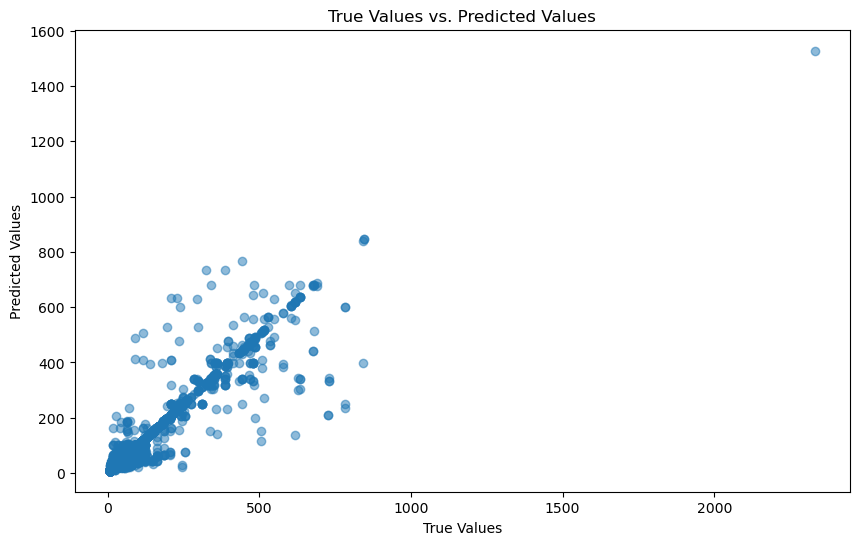

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_preds_tuned, alpha=0.5)
plt.title('True Values vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


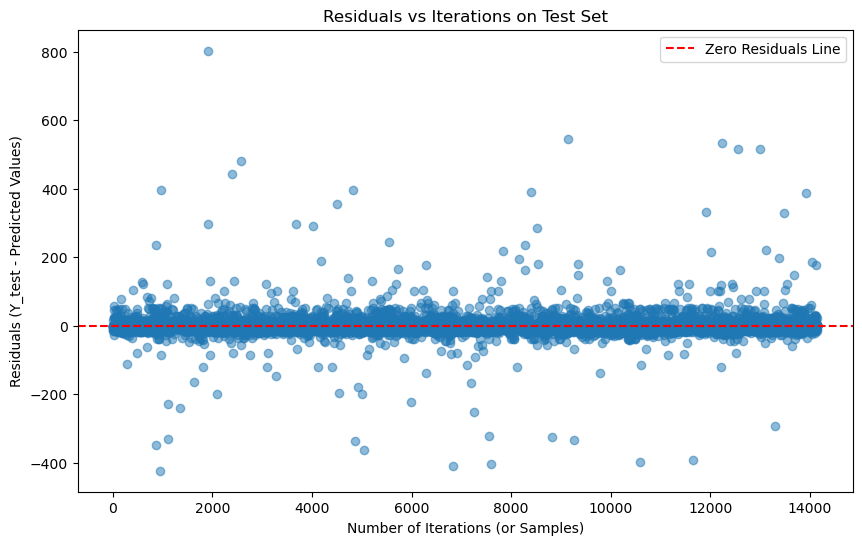

In [115]:
# Calculating residuals
residuals = Y_test - test_preds_tuned

#Scatter plot of residuals against the index (number of iterations)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals vs Iterations on Test Set')
plt.xlabel('Number of Iterations (or Samples)')
plt.ylabel('Residuals (Y_test - Predicted Values)')
plt.legend()
plt.show()

### Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

# Create and fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_pca_train, Y_train)
test_preds = linear_regressor.predict(X_pca_test)
test_metrics = metrics_calculation(Y_test, test_preds)
print("Test Metrics:", test_metrics)

Test Metrics: {'MAE': 36.35513121231546, 'MSE': 4311.158144059693, 'RMSE': 65.65941017142701, 'R^2': 0.24712213123197535}


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Split the training data for hyperparameter tuning
X_train_h, X_Valid, Y_train_h, Y_Valid = train_test_split(X_pca_train, Y_train, test_size=0.25, random_state=42)

# Define hyperparameters and their possible values for Linear Regression
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create the Linear Regression model
linear_regressor = LinearRegression()

# Create the GridSearchCV object
grid_search_linear = GridSearchCV(linear_regressor, param_grid_linear, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_linear.fit(X_train_h, Y_train_h)

# Get the best hyperparameters
best_params_linear = grid_search_linear.best_params_
print("Best Hyperparameters:", best_params_linear)

# Predictions on the validation set using the best model
best_model_linear = grid_search_linear.best_estimator_
valid_preds_linear = best_model_linear.predict(X_Valid)

# Evaluate the model on the validation set
valid_metrics_linear = metrics_calculation(Y_Valid, valid_preds_linear)
print("Validation Metrics:", valid_metrics_linear)


Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Validation Metrics: {'MAE': 36.78001123648448, 'MSE': 5018.613442283831, 'RMSE': 70.84217276653668, 'R^2': 0.20900502173158741}
